# 1. Jelly beans in the jar

a. The sample space of the experiment is {(strawberry), (blueberry), (cinnamon)}

b. 
A = (strawberry)
B = (~cinnamon)

P(A) = 2/4 = 1/2
P(B) = 2/4 + 1/4 = 3/4

c. These events are not mutually exclusive. Drawing a strawberry flavored jelly bean from the jar
fulfills both events. Furthermore, their added probability exceeds 1.

# 2. Redefine P for events that are not equally likely

In [30]:
# Initial definition 
def P(S, A):
    if set(A).issubset(set(S)):
        return len(A)/len(S)
    else:
        return 0

In [31]:
# Adapted definition: 
def P(S, A, weights = None):
    if not weights:
        weights = [1]*len(S)
    
    if len(S) != len(weights):
        raise ValueError("Each outcome in the sample space should have a weight assigned")
    
    return sum(
        [weights[i] for i in range(len(S)) if S[i] in A]
    ) / sum(weights)

In [32]:
# Testing the adapted definition
P(['strawberry', 'blueberry', 'cinnamon'], ['strawberry'], [2, 1, 1])

0.5

In [33]:
P(['strawberry', 'blueberry', 'cinnamon'], ['strawberry', 'blueberry'], [2, 1, 1])

0.75

# 3. Getting started with PreliZ

In [34]:
import preliz as pz

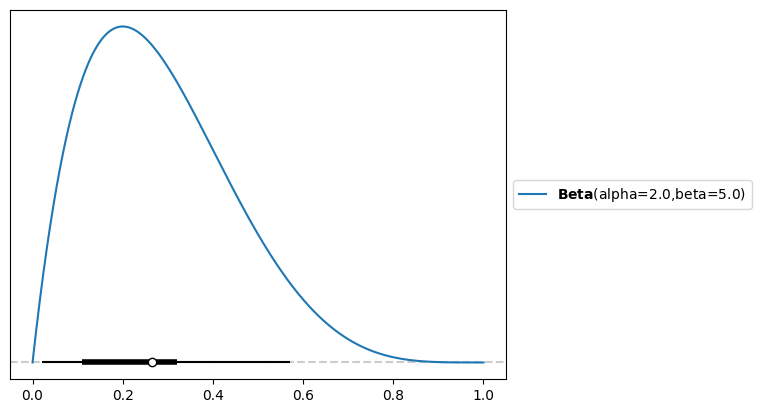

In [35]:
pz.Beta(2, 5).plot_pdf(pointinterval=True);

<Axes: >

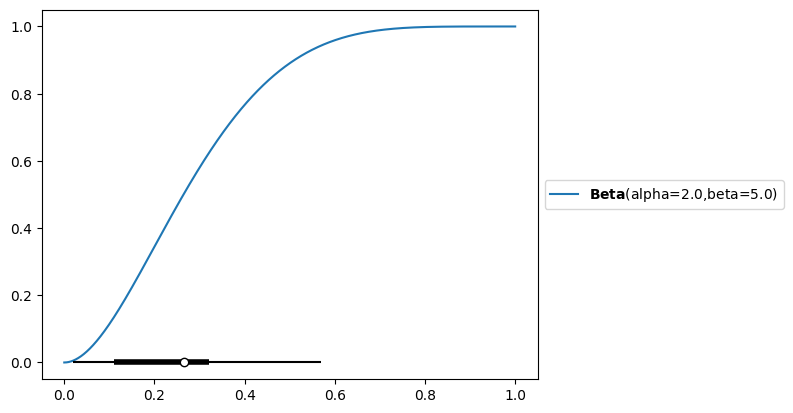

In [36]:
pz.Beta(2, 5).plot_cdf(pointinterval=True)

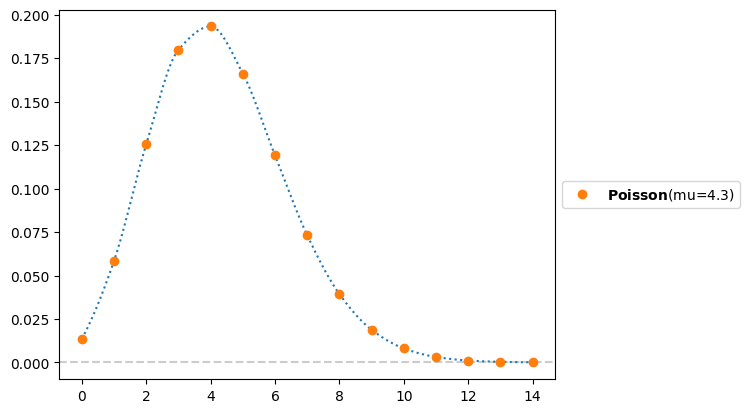

In [37]:
pz.Poisson(4.3).plot_pdf();

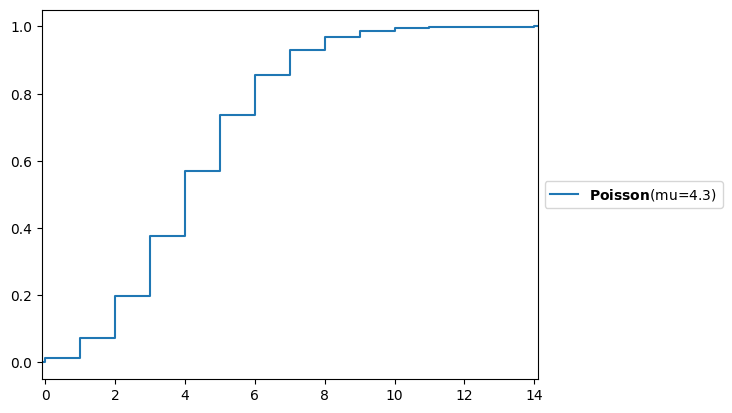

In [38]:
pz.Poisson(4.3).plot_cdf();

In [39]:
pz.Poisson(4.3).plot_interactive()

interactive(children=(FloatSlider(value=4.3, description='mu (0, inf)', max=14.0, min=2.220446049250313e-16, s…

In [40]:
pz.Normal().plot_interactive()

interactive(children=(FloatSlider(value=0.0, description='mu (-inf, inf)', max=10.0, min=-10.0, style=SliderSt…

# 4. Investigating the "percentile point function"

In [41]:
import matplotlib.pyplot as plt

In [42]:
from preliz.distributions.distributions import Distribution


def plot_distribution(d: Distribution):
    fig, axs = plt.subplots(nrows=3, ncols=1)
    d.plot_ppf(ax=axs[0])
    d.plot_cdf(ax=axs[1])
    d.plot_pdf(ax=axs[2])

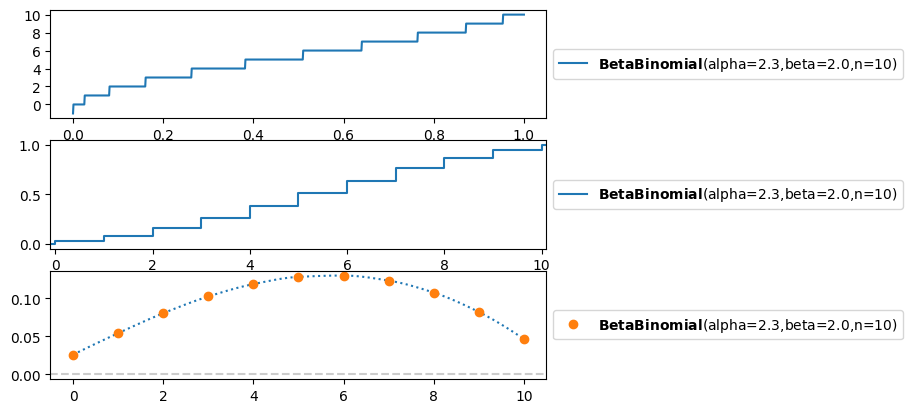

In [43]:
distribution = pz.BetaBinomial(alpha=2.3, beta=2, n=10)
plot_distribution(distribution)


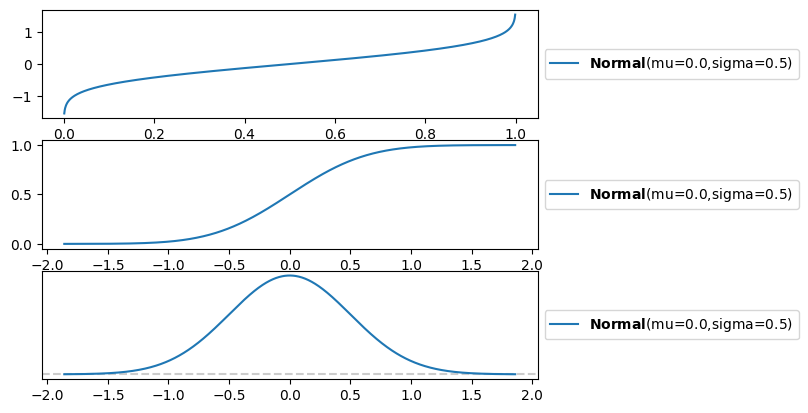

In [44]:
distribution = pz.Normal(mu=0, sigma=0.5)
plot_distribution(distribution)

The PPF is the inverse of the CDF

# 5. The probability that is sunny, given that it is 9th of July 1816 is 

c. p(sunny | 9 of July of 1816)

and

e. p(sunny, 9th of July 1816) / p(9th of July of 1816)

# 6. What if the Pope is not a human

Adding the possibility of the Pope not being a human, means we expand the sample space of the experiment, thus both probabilities will have a lower value than the one calculated for the initial sample space. 

# 7. Skew normal moments computation

<Axes: >

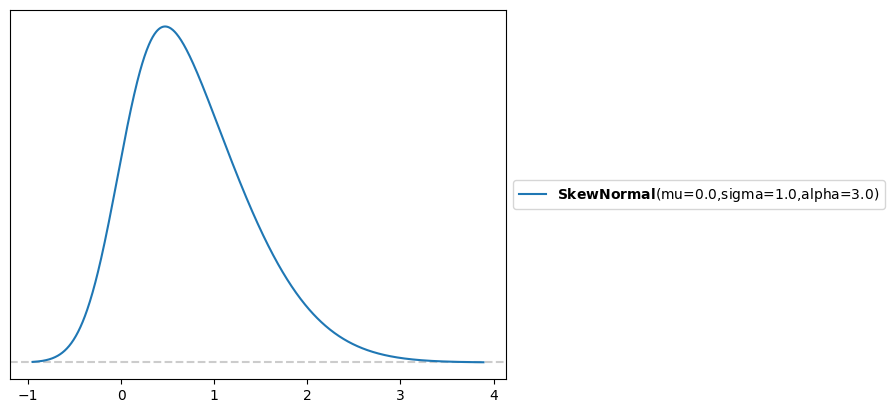

In [45]:
# Initial skew normal plot
distribution = pz.SkewNormal(mu=0.0, sigma=1.0, alpha=3.0)
distribution.plot_pdf()

In [46]:
true_mean, true_var = distribution.rv_frozen.stats("mv")
variables = distribution.rvs((10, 500))

# print(len(variables), len(variables[0]))

In [47]:
print(variables)

[[ 0.6626213   0.70080521  1.18217348 ...  0.82574835  0.26591484
   0.80510652]
 [ 0.40927628  0.15731728  2.19111071 ...  0.28474263  1.69191504
   0.66175048]
 [ 1.70479324  0.57678758 -0.16965631 ...  0.73825172  0.66201211
   0.49534197]
 ...
 [ 1.09469635  1.76841232 -0.00885915 ...  0.76274189  1.72813907
   0.21005277]
 [ 0.90760504  1.69067208 -0.66064905 ...  1.37591207  1.63839346
   1.73284502]
 [ 0.25834532  0.71780451  0.42696553 ...  0.06676528 -0.2873323
   0.92891898]]


In [48]:
print(type(variables))

<class 'numpy.ndarray'>


In [49]:
variables.mean()

0.7420665783757717

In [62]:
true_mean, true_var

(0.7569397566060481, 0.42704220486917677)

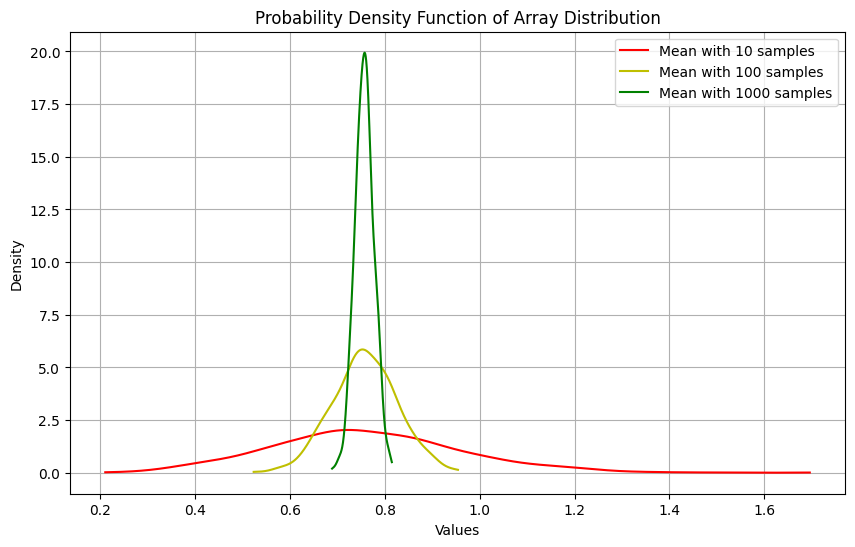

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

configs = [(10, 'r-'), (100, 'y-'), (1000, 'g-')]

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Probability Density Function of the mean recovered from the sample')
plt.grid(True)

for c in configs:
    variables = distribution.rvs((c[0], 500))
    
    # Generate sample data (replace this with your actual data)
    data = variables.mean(0)
    
    # Estimate the PDF using KDE
    kde = gaussian_kde(data)
    
    # Create a range of x values
    x_range = np.linspace(min(data), max(data), 1000)
    
    # Calculate the PDF values
    pdf_values = kde(x_range)
    
    plt.plot(x_range, pdf_values, c[1], label=f'Mean with {c[0]} samples')
    
plt.legend()
plt.show()

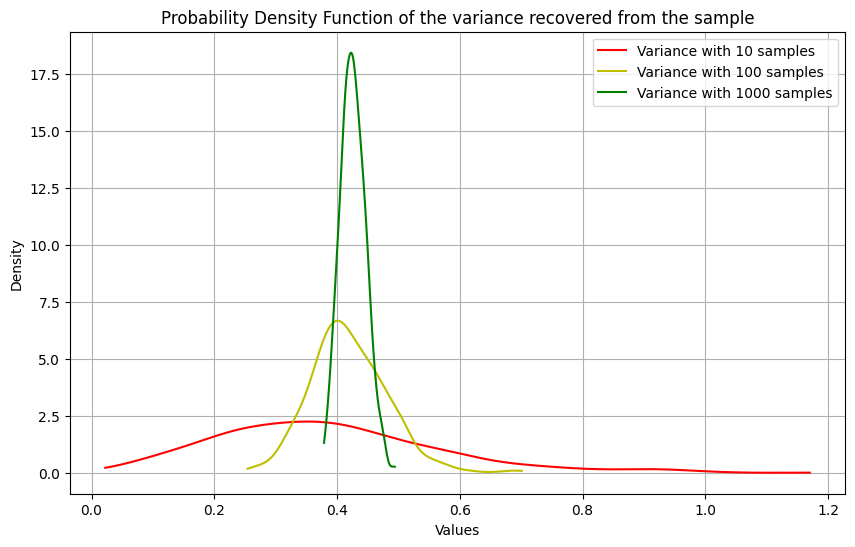

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

configs = [(10, 'r-'), (100, 'y-'), (1000, 'g-')]

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Probability Density Function of the variance recovered from the sample')
plt.grid(True)

for c in configs:
    variables = distribution.rvs((c[0], 500))
    
    # Generate sample data (replace this with your actual data)
    data = variables.var(0)
    
    # Estimate the PDF using KDE
    kde = gaussian_kde(data)
    
    # Create a range of x values
    x_range = np.linspace(min(data), max(data), 1000)
    
    # Calculate the PDF values
    pdf_values = kde(x_range)
    
    plt.plot(x_range, pdf_values, c[1], label=f'Variance with {c[0]} samples')
    
plt.legend()
plt.show()

# 8. Student distribution recover

<Axes: >

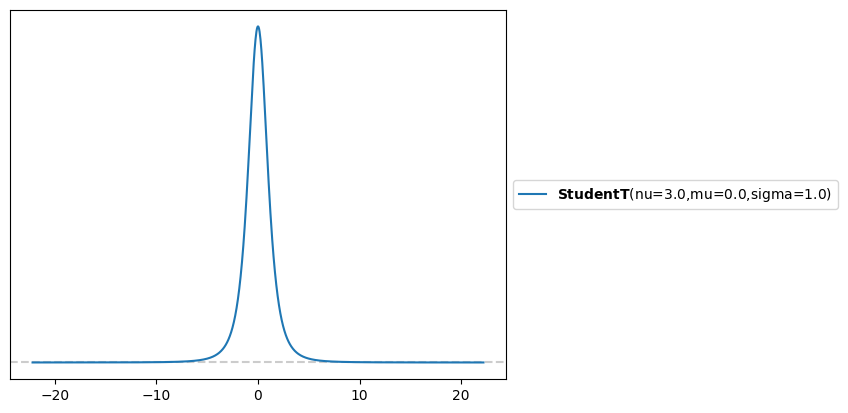

In [89]:
distribution = pz.StudentT(nu=3, mu=0, sigma=1)
distribution.plot_pdf()

In [90]:
distribution.rv_frozen.stats("mv")

(0.0, 3.0)

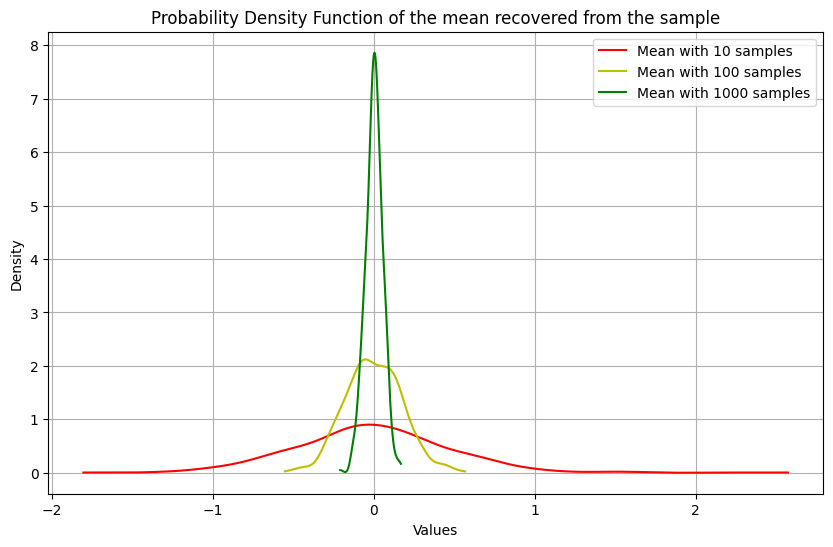

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

configs = [(10, 'r-'), (100, 'y-'), (1000, 'g-')]

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Probability Density Function of the mean recovered from the sample')
plt.grid(True)

for c in configs:
    variables = distribution.rvs((c[0], 500))
    
    # Generate sample data (replace this with your actual data)
    data = variables.mean(0)
    
    # Estimate the PDF using KDE
    kde = gaussian_kde(data)
    
    # Create a range of x values
    x_range = np.linspace(min(data), max(data), 1000)
    
    # Calculate the PDF values
    pdf_values = kde(x_range)
    
    plt.plot(x_range, pdf_values, c[1], label=f'Mean with {c[0]} samples')
    
plt.legend()
plt.show()

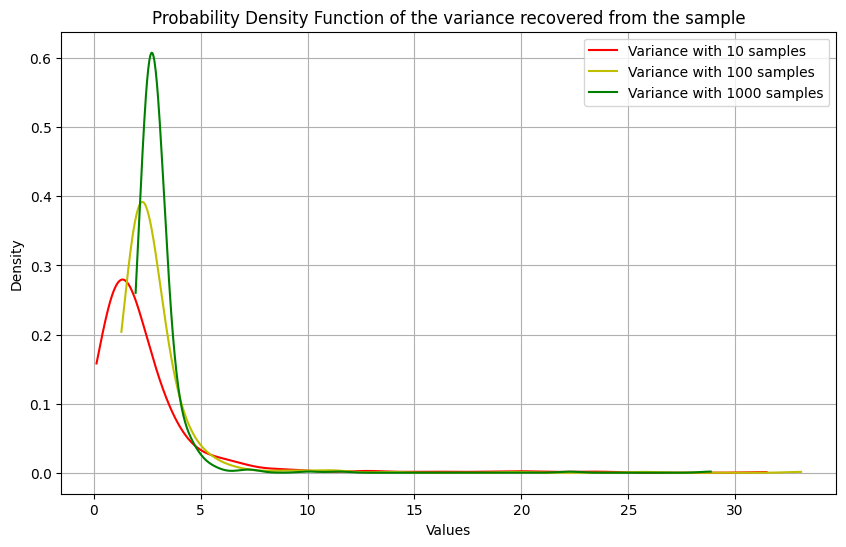

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

configs = [(10, 'r-'), (100, 'y-'), (1000, 'g-')]

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Probability Density Function of the variance recovered from the sample')
plt.grid(True)

for c in configs:
    variables = distribution.rvs((c[0], 500))
    
    # Generate sample data (replace this with your actual data)
    data = variables.var(0)
    
    # Estimate the PDF using KDE
    kde = gaussian_kde(data)
    
    # Create a range of x values
    x_range = np.linspace(min(data), max(data), 1000)
    
    # Calculate the PDF values
    pdf_values = kde(x_range)
    
    plt.plot(x_range, pdf_values, c[1], label=f'Variance with {c[0]} samples')
    
plt.legend()
plt.show()

For the student T distribution, the variance is much harder to recover. 

When using nu=3, we can see in the chart above a spike around the true value 3, but there is a long tail of the distribution indicating that the variance can be as large as 35. 
